In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier

### Read Dataset ###

In [58]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Waragling ### 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
X = df.drop('Outcome',axis=1)
y= df.Outcome

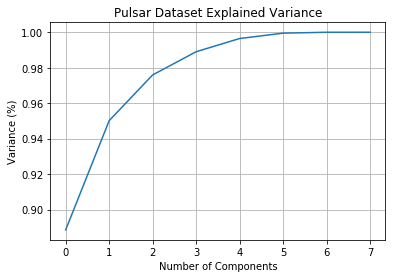

In [42]:
pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid(True)
plt.show()

In [43]:
pca = PCA(n_components=5)
X = pca.fit_transform(x)

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.64,random_state=2)

In [45]:
dc= DecisionTreeClassifier()
model = dc.fit(X_train,y_train)

In [46]:
dc.score(X_test,y_test)

0.6971544715447154

In [47]:
round(cross_val_score(model,X, y, cv=6).mean()*100,2)

67.57

In [48]:
y_pred = model.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred)

array([[245,  77],
       [ 72,  98]], dtype=int64)

### Using Entropy ###

In [62]:
dc = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model=dc.fit(X_train,y_train)

In [63]:
dc.score(X_test,y_test)

0.7154471544715447

In [64]:
round(cross_val_score(model,X, y, cv=6).mean()*100,2)

75.52

In [65]:
y_pred = model.predict(X_test)

In [54]:
confusion_matrix(y_test,y_pred)

array([[274,  48],
       [ 92,  78]], dtype=int64)

In [67]:
X_test['Prediction']=y_pred

C:\Users\tanoy.bhattacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
prediction = pd.DataFrame(X_test).to_csv('prediction.csv')

## Random Forest Classifier ##

In [77]:
rf = RandomForestClassifier()
model = rf.fit(X_train,y_train)

C:\Users\tanoy.bhattacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
rf.score(X_test,y_test)

0.7520325203252033

In [80]:
round(cross_val_score(model,X, y, cv=6).mean()*100,2)

73.84

In [82]:
y_pred = model.predict(X_test)

In [84]:
confusion_matrix(y_test,y_pred)

array([[281,  41],
       [ 81,  89]], dtype=int64)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7520325203252033
